# First working (crude) version

## SEE FIRST EXAMPLE IN 04 - Automatic differentiation

Equation is G = dy/dx - 2x = 0, solution is y=x**2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Create training data.
n = 11
x = tf.Variable(np.linspace(0, 1, n).reshape((n, 1)), dtype=tf.float32)

In [14]:
# Create the first layer weights and biases, and the output weights.
H = 10
w = tf.Variable(tf.random.uniform(shape=[1, H], minval=-1, maxval=1))
b = tf.Variable(tf.random.uniform(shape=[1, H], minval=-1, maxval=1))
v = tf.Variable(tf.random.uniform(shape=[1, H], minval=-1, maxval=1))

In [15]:
# So I just put this into a loop and I'm good...

In [16]:
num_epochs = 200
learning_rate = 0.01
losses = []

for i in range(num_epochs):
    # Compute the forward pass for each training point.
    with tf.GradientTape(persistent=True) as tape:
        z = w*x + b
        s = tf.sigmoid(z)
        N = tf.math.reduce_sum(v*s, axis=1)
        N = tf.reshape(N, (n, 1))
        dN_dx = grad1 = tape.gradient(N, x)
        G = x*dN_dx + N - 2*x
        L = tf.reduce_sum(G**2)
        losses.append(L)

    grad = tape.gradient(L, {'w': w, 'b': b, 'v': v})
    # Update the parameters for this pass.
    w.assign_sub(learning_rate*grad['w'])
    b.assign_sub(learning_rate*grad['b'])
    v.assign_sub(learning_rate*grad['v'])
print(L)

tf.Tensor(0.010451583, shape=(), dtype=float32)


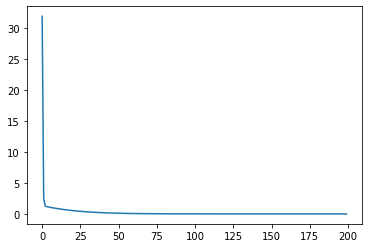

In [17]:
plt.plot(losses)